In [1]:
import mllogdpcommon
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

smilelogd, descriptors, smileslist, setids = mllogdpcommon.import_descriptor ("descriptors.txt")

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(descriptors)
print(pca.explained_variance_ratio_)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

plt.show()

[0.15822764 0.11271205 0.05794167 0.05443706 0.04335487 0.03767192
 0.0349922  0.02751116 0.02292302 0.01920428 0.01749242 0.01672538
 0.0146329  0.01360922 0.01213407 0.0117837  0.01125254 0.01033936
 0.00924466 0.00886339]


In [2]:
# Da quello che vedo, anche se la varianza spiegata e' minima
# c'e' un drop dopo la seconda componente 

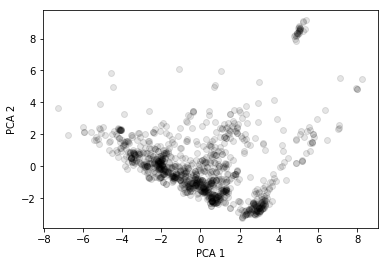

In [3]:
import pandas as pd

PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [4]:
# Diciamo che si vedono almeno tre clusters

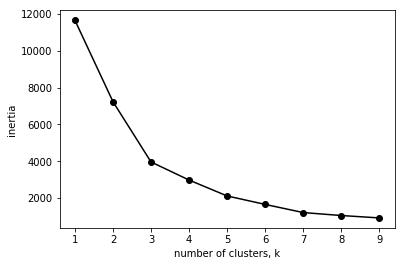

In [5]:
from sklearn.cluster import KMeans

ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [6]:
# usando l'idea del punto di Elbow possiamo in effetti dire che ci sono tre cluster ben distinti 
# Quindi possiamo immaginare ad esempio di fare tre modelli distinti

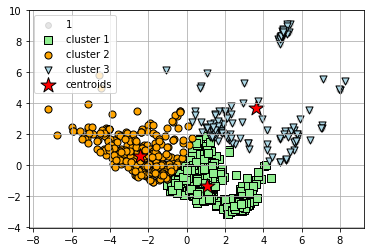

In [7]:
import numpy as np

# Using three clusters 
NC = 3

model = KMeans(n_clusters=NC)
   
X = PCA_components.iloc[:,:2].values

y_km = model.fit(X)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')

clusters = {}
for idx , l in enumerate(y_km.labels_):
    if l in clusters:
        clusters[l].append(X[idx])
    else:
        clusters[l] = []
        clusters[l].append(X[idx])
        
        
c1 = np.asarray(clusters[0])
plt.scatter(
    c1[:,0],c1[:,1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

c2 = np.asarray(clusters[1])
plt.scatter(
    c2[:,0],c2[:,1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

c3 = np.asarray(clusters[2])
plt.scatter(
    c3[:,0],c3[:,1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()
    

   1 1.81716791 0.46434547
   2 1.45074436 0.57235774
   3 1.31681937 0.61183539
   4 1.23352496 0.63638845
   5 1.22780637 0.63807415
   6 1.21600741 0.64155218
   7 1.21653151 0.64139769
   8 1.21624166 0.64148313
   9 1.21735551 0.64115479
  10 1.21778969 0.64102681
  11 1.21876163 0.64074030
  12 1.21900414 0.64066882
  13 1.21887406 0.64070716
  14 1.21898587 0.64067420
  15 1.21902819 0.64066173
  16 1.21901926 0.64066436
  17 1.21900478 0.64066863
  18 1.21900626 0.64066819
  19 1.21901007 0.64066707
Suggested number of components:  6


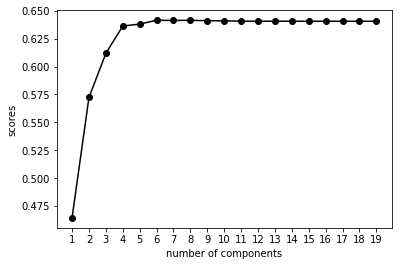

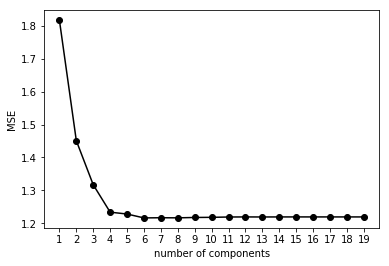

In [8]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np

smilelogd, X, Y, setids = mllogdpcommon.import_descriptor ("descriptors.txt")

scores = []
mses = []
ncomps = []
for ncomp in range(1,20):
    pls = PLSRegression(ncomp)
    pls.fit(X, Y)
    
    y_cv = cross_val_predict(pls, X, Y, cv=10)
    
    score = r2_score(Y, y_cv)
    mse = mean_squared_error(Y, y_cv)
    
    scores.append(score)
    mses.append(mse)
    ncomps.append(ncomp)
    print("%4d %10.8f %10.8f"%(ncomp, mse, score))
    
msemin = np.argmin(mses)
print("Suggested number of components: ", msemin+1)
    
plt.plot(ncomps, scores, '-o', color='black')
plt.xlabel('number of components')
plt.ylabel('scores')
plt.xticks(ncomps)
plt.show()

plt.plot(ncomps, mses, '-o', color='black')
plt.xlabel('number of components')
plt.ylabel('MSE')
plt.xticks(ncomps)
plt.show()

In [9]:
ncomp = 6

pls = PLSRegression(ncomp)
pls.fit(X, Y)
    
y_cv = cross_val_predict(pls, X, Y, cv=10)
    
score = r2_score(Y, y_cv)
mse = mean_squared_error(Y, y_cv)
    

print("%4d %10.8f %10.8f"%(ncomp, mse, score))
    

   6 1.21600741 0.64155218


In [10]:
# adesso testare con il cluster ma forse prima fare un check usando lo stesso set loro di training e test
print(len(smilelogd), len(descriptors), len(smileslist), len(setids), X.shape, len(Y))

1091 1091 1091 1091 (1091, 1878) 1091


In [11]:
ytr = []
yte = []
xtr = []
xte = []
type(setids)
for idx, smile in enumerate(setids):
    #print(("%5d ")%(idx), "\"%s\""%(setids[smile]), "%10.7f"%Y[idx], X[idx,:])
    if setids[smile] == " Te ":
        yte.append(Y[idx])
        xte.append(X[idx,:])
    elif setids[smile] == " Tr ":
        ytr.append(Y[idx])
        xtr.append(X[idx,:])
    else:
        print("Error ", setids[smile])
 


   1 1.96894987 0.43791668
   2 1.55924282 0.55487725
   3 1.41620729 0.59571013
   4 1.31012299 0.62599440
   5 1.30665035 0.62698575
   6 1.29993125 0.62890387
   7 1.30145836 0.62846792
   8 1.30097884 0.62860482
   9 1.30176983 0.62837901
  10 1.30165558 0.62841162
  11 1.30281187 0.62808153
  12 1.30264310 0.62812971
  13 1.30256423 0.62815223
  14 1.30269807 0.62811402
  15 1.30272604 0.62810604
  16 1.30273883 0.62810239
  17 1.30273329 0.62810397
  18 1.30273387 0.62810380
  19 1.30273946 0.62810221
Suggested number of components tr:  6


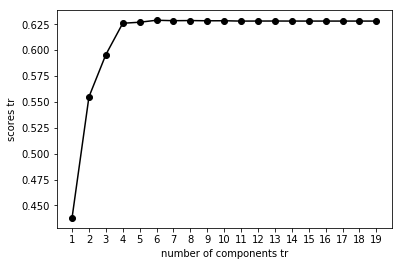

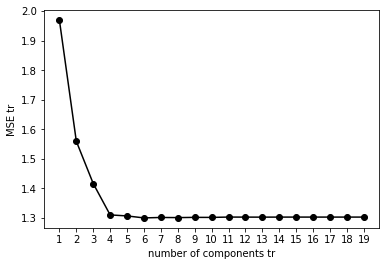

In [12]:
# valutazione del numero di componenti principali ideale da usare, usando solo i dati del training set (xtr, ytr)
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np

trscores = []
trmses = []
trncomps = []
for trncomp in range(1,20):
    pls = PLSRegression(trncomp)
    pls.fit(xtr, ytr)
    
    y_cv = cross_val_predict(pls, xtr, ytr, cv=10)
    
    trscore = r2_score(ytr, y_cv)
    trmse = mean_squared_error(ytr, y_cv)
    
    trscores.append(trscore)
    trmses.append(trmse)
    trncomps.append(trncomp)
    print("%4d %10.8f %10.8f"%(trncomp, trmse, trscore))
    
msetrmin = np.argmin(trmses)
print("Suggested number of components tr: ", msetrmin+1)
    
plt.plot(trncomps, trscores, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('scores tr')
plt.xticks(trncomps)
plt.show()

plt.plot(trncomps, trmses, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('MSE tr')
plt.xticks(trncomps)
plt.show()

# si può notare che nonostante il numero suggerito di componenti da usare per costruire il modello sia di 6 componenti, in realtà \
# dal grafico si evince che probabilmente si può utilizzare anche solo 4 componenti principali, perciò costruiremo sia un modello usando 6 componenti,che anche un altro usandone 4 

In [15]:
# costruzione del modello usando 6 componenti come suggerito dall'operazione fatta in precedenza per sondare il terreno 
ncomp = 6

pls_6 = PLSRegression(ncomp)
pls_6.fit(xtr, ytr)
    
y_cv6 = cross_val_predict(pls_6, xtr, ytr, cv=10)
    
score6 = r2_score(ytr, y_cv6)
mse6 = mean_squared_error(ytr, y_cv6)    

print("comp: %4d MSE: %10.8f core: %10.8f"%(ncomp, mse6, score6))

comp:    6 MSE: 1.29993125 core: 0.62890387


In [18]:
# costruzione del modello usando 4 componenti seguendo l'intuizione basata sul grafico 
ncomp = 4

pls_4 = PLSRegression(ncomp)
pls_4.fit(xtr, ytr)
    
y_cv4 = cross_val_predict(pls_4, xtr, ytr, cv=10)
    
score4 = r2_score(ytr, y_cv4)
mse4 = mean_squared_error(ytr, y_cv4)    

print("comp: %4d MSE: %10.8f core: %10.8f"%(ncomp, mse4, score4))

comp:    4 MSE: 1.31012299 core: 0.62599440


-0.7400000  0.7084391 -1.4484391  0.8081319 -1.5481319
-0.6800000 -0.1521273 -0.5278727  0.0032321 -0.6832321
-0.5000000  0.8280910 -1.3280910  0.8114093 -1.3114093
-0.3900000 -0.3317539 -0.0582461 -0.2742768 -0.1157232
-0.3400000 -0.3467695  0.0067695 -0.1961360 -0.1438640
-0.2100000  0.0397691 -0.2497691  0.0384522 -0.2484522
-0.1900000 -0.1384333 -0.0515667  0.0646797 -0.2546797
-0.1300000  1.2332647 -1.3632647  1.3317859 -1.4617859
-0.0500000  0.6618579 -0.7118579  0.6847050 -0.7347050
-0.0400000  1.2845170 -1.3245170  1.1942019 -1.2342019
 0.0500000  2.4631904 -2.4131904  2.5720603 -2.5220603
 0.2000000  1.9022795 -1.7022795  1.8485748 -1.6485748
 0.2100000 -0.1343073  0.3443073 -0.0925255  0.3025255
 0.3000000  0.3589522 -0.0589522  0.3999179 -0.0999179
 0.4000000  0.7359260 -0.3359260  0.5439036 -0.1439036
 0.6400000  1.4667459 -0.8267459  1.4274454 -0.7874454
 0.6930000  0.7847312 -0.0917312  0.7455643 -0.0525643
 0.9800000  1.4129415 -0.4329415  1.4255457 -0.4455457
 1.1000000

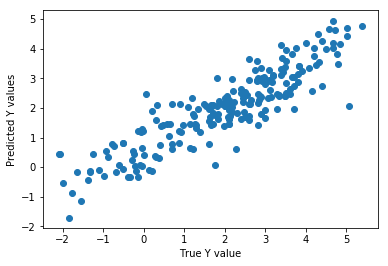

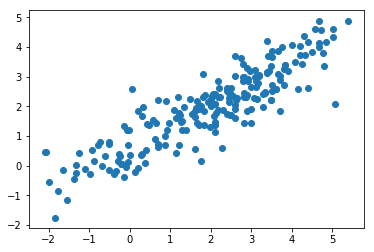

In [31]:

Y_pred6 = pls_6.predict(xte)
Y_pred4 = pls_4.predict(xte)

mse_pred6 = mean_squared_error(yte, Y_pred6 )
mse_pred4 = mean_squared_error(yte, Y_pred4 )

diff4 = []
diff6 = []

for idx, val in enumerate(yte):
    diff4.append(val-Y_pred4[idx])
    diff6.append(val-Y_pred6[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                val, Y_pred6[idx], diff6[-1], \
                            Y_pred4[idx], diff4[-1]))
    
print("MSE 6 comp: ", mse_pred6)
print("MSE 4 comp: ", mse_pred4)


plt.xlabel("True Y value")
plt.ylabel("Predicted Y values")

plt.scatter(yte, Y_pred6)

plt.show()

plt.scatter(yte, Y_pred4)

plt.show()
